In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
binary = pd.read_csv("binary.csv")
multiclass = pd.read_csv("multiclass.csv")

In [3]:
binary.head()

Protocol   Flow Duration   Total Fwd Packets   Total Backward Packets  \
0          6       119360531                 136                      213   
1          6       118838133                  40                       43   
2          6             108                   1                        2   
3         17           21925                   2                        2   
4          6             141                   1                        2   

   Total Length of Fwd Packets   Total Length of Bwd Packets  \
0                      41528.0                      155400.0   
1                       4216.0                       16444.0   
2                          0.0                           0.0   
3                         62.0                          94.0   
4                          6.0                          12.0   

    Fwd Packet Length Max   Fwd Packet Length Min   Fwd Packet Length Mean  \
0                  2955.0                     0.0               305.352941   
1                   696.0                     0.0               105.400000   
2                     0.0                     0.0                 0.000000   
3                    31.0                    31.0                31.000000   
4                     6.0                     6.0                 6.000000   

    Fwd Packet Length Std  ...    Active Std   Active Max   Active Min  \
0              610.445587  ...  1.522822e+06    2403023.0     249428.0   
1              188.610683  ...  8.040554e+05    1152339.0      15233.0   
2                0.000000  ...  0.000000e+00          0.0          0.0   
3                0.000000  ...  0.000000e+00          0.0          0.0   
4                0.000000  ...  0.000000e+00          0.0          0.0   

    Idle Mean       Idle Std    Idle Max    Idle Min  SimillarHTTP   Inbound  \
0  58229360.5  565451.372605  58629195.0  57829526.0           0.0         0   
1  58827757.0  223646.561181  58985899.0  58669615.0           0.0         0   
2         0.0       0.000000         0.0         0.0           0.0         1   
3         0.0       0.000000         0.0         0.0           0.0         0   
4         0.0       0.000000         0.0         0.0           0.0         1   

    Label  
0  BENIGN  
1  BENIGN  
2  BENIGN  
3  BENIGN  
4  BENIGN  

[5 rows x 81 columns]

In [4]:
multiclass.head()

Protocol   Flow Duration   Total Fwd Packets   Total Backward Packets  \
0         17               1                   2                        0   
1         17               1                   2                        0   
2         17               1                   2                        0   
3         17               2                   2                        0   
4         17               1                   2                        0   

   Total Length of Fwd Packets   Total Length of Bwd Packets  \
0                        768.0                           0.0   
1                       2944.0                           0.0   
2                       2944.0                           0.0   
3                       2944.0                           0.0   
4                       2944.0                           0.0   

    Fwd Packet Length Max   Fwd Packet Length Min   Fwd Packet Length Mean  \
0                   384.0                   384.0                    384.0   
1                  1472.0                  1472.0                   1472.0   
2                  1472.0                  1472.0                   1472.0   
3                  1472.0                  1472.0                   1472.0   
4                  1472.0                  1472.0                   1472.0   

    Fwd Packet Length Std  ...   Active Std   Active Max   Active Min  \
0                     0.0  ...          0.0          0.0          0.0   
1                     0.0  ...          0.0          0.0          0.0   
2                     0.0  ...          0.0          0.0          0.0   
3                     0.0  ...          0.0          0.0          0.0   
4                     0.0  ...          0.0          0.0          0.0   

   Idle Mean   Idle Std   Idle Max   Idle Min  SimillarHTTP   Inbound   Label  
0        0.0        0.0        0.0        0.0           0.0         1     DNS  
1        0.0        0.0        0.0        0.0           0.0         1     DNS  
2        0.0        0.0        0.0        0.0           0.0         1     DNS  
3        0.0        0.0        0.0        0.0           0.0         1     DNS  
4        0.0        0.0        0.0        0.0           0.0         1     DNS  

[5 rows x 81 columns]

In [5]:
# See the new counts with invalid entries removed
print(binary[" Label"].value_counts())
print(multiclass[" Label"].value_counts())

BENIGN     54571
DNS         4961
LDAP        4961
MSSQL       4961
NetBIOS     4961
NTP         4961
SNMP        4961
SSDP        4961
UDP         4961
Syn         4961
TFTP        4961
UDP-lag     4961
Name:  Label, dtype: int64
DNS        54581
LDAP       54581
MSSQL      54581
NetBIOS    54581
NTP        54581
SNMP       54581
SSDP       54581
UDP        54581
Syn        54581
TFTP       54581
UDP-lag    54581
Name:  Label, dtype: int64


Binary Dataset will be done first.

In [6]:
# Encode binary labels
binary[" Label"] = binary[" Label"].apply(lambda x: 0 if x == "BENIGN" else 1)

In [7]:
print(binary[" Label"].value_counts())

0    54571
1    54571
Name:  Label, dtype: int64


Correlation Based Feature Selection (see below for matrix). Uses Pearson and threshold of 0.2

In [44]:
corrMatrix = binary.corr("pearson")
thresh = 0.2
include = []
exclude = []

for index, row in corrMatrix.iterrows():
    if abs(row[" Label"]) > thresh:
        include.append(index)
    else:
        exclude.append(index)

print(f"Correlation based feature selection using threshold of {thresh}:\n\nIncluded ({len(include)} features): {include}\n\nExcluded ({len(exclude)} features): {exclude}")


Correlation based feature selection using threshold of 0.2:

Included (30 features): [' Protocol', ' Flow Duration', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', 'Bwd IAT Total', 'Fwd PSH Flags', 'Fwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' RST Flag Count', ' URG Flag Count', ' CWE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', 'Init_Win_bytes_forward', ' Inbound', ' Label']

Excluded (51 features): [' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' 

In [23]:
plt.figure(figsize =(100,100))
htMap = sns.heatmap(binary.corr("pearson"), annot=True, cmap=plt.cm.Reds,annot_kws = {"fontsize" : "xx-large"})
htMap.set_xticklabels(htMap.get_xmajorticklabels(), size = 24,rotation = 90)
htMap.set_yticklabels(htMap.get_ymajorticklabels(), size = 24,rotation = 0)
plt.title("Pearson Correlation Matrix", fontsize =24)
plt.savefig("corr.png")
plt.show()

Mutual Information

In [50]:
y = binary[" Label"].copy()
X = binary.drop([" Label"], axis = 1)

scores = mutual_info_classif(X, y, random_state=42)

# Collect all features and their scores.
feature_list = []

for i, col in enumerate(X.columns):
    feature_list.append((col, scores[i]))

# Sort features by MI score in descending order.
sorted_feature_list = sorted(feature_list, key=lambda tup: tup[1], reverse=True)

print("MI Scores in order of rank:")
# Print features in order of score.
for val in sorted_feature_list:
    print(f"{val[0]}: {val[1]}")

MI Scores in order of rank:
 Max Packet Length: 0.5605412328552155
 Average Packet Size: 0.5556333366467627
 Fwd Packet Length Mean: 0.5555884551206605
 Packet Length Mean: 0.5552072908387014
 Avg Fwd Segment Size: 0.5551879113368077
 Fwd Packet Length Max: 0.5465451607359857
 Subflow Fwd Bytes: 0.5290724942583238
Total Length of Fwd Packets: 0.5287926672409189
 Min Packet Length: 0.526818538997486
 Fwd Packet Length Min: 0.5259402559904427
Flow Bytes/s: 0.5031775572485737
 Inbound: 0.41788514443771874
 Flow Packets/s: 0.39082652072830726
Fwd Packets/s: 0.38536004620070896
 Flow IAT Mean: 0.3817988301404771
 Flow IAT Max: 0.3759146086103746
 Flow Duration: 0.36452766151308547
Init_Win_bytes_forward: 0.3526951036415147
 Flow IAT Std: 0.3399018464237926
 Bwd Packets/s: 0.339826793617225
 Bwd Header Length: 0.31531544365157904
 Total Backward Packets: 0.3130407945493905
 Subflow Bwd Packets: 0.31212214767951774
 Fwd IAT Mean: 0.30707650388659835
 Fwd IAT Max: 0.30659734234855507
 Packet L

In [55]:
# Apply threshold to get feature list
thresh = 0.1
include = []
exclude = []

for elem in feature_list:
    if elem[1] > thresh:
        include.append(elem[0])
    else:
        exclude.append(elem[0])

print(f"Mutual information based feature selection using threshold of {thresh}:\n\nIncluded ({len(include)} features): {include}\n\nExcluded ({len(exclude)} features): {exclude}")

Mutual information based feature selection using threshold of 0.1:

Included (52 features): [' Protocol', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Max', ' Bwd IAT Min', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' URG Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Fwd Header Length.1',

Principal Component Analysis

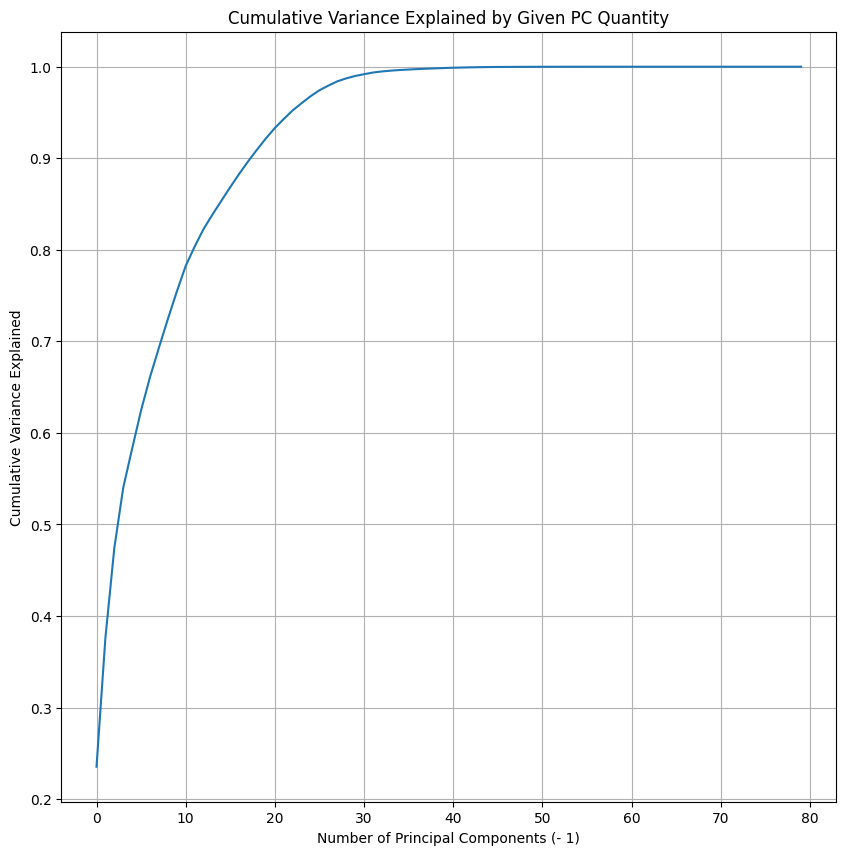

In [14]:
# Scale data in preparation for PCA
df_pca = X.copy()
df_scaled = StandardScaler().fit_transform(df_pca)

# default PCA value is a number of components equal to the number of features. We also get the cumulative variance explained by each quantity of PCs.
pca_all_fitted = PCA(random_state=42).fit(df_scaled)
explained_variance_cumulative = np.cumsum(pca_all_fitted.explained_variance_ratio_)

# Plot the curve of PCA components to explained variance  
plt.figure(figsize=(10,10)) 
plt.plot(explained_variance_cumulative)   
plt.grid() 
plt.xlabel('Number of Principal Components (- 1)') 
plt.ylabel('Cumulative Variance Explained')  
plt.title('Cumulative Variance Explained by Given PC Quantity')
plt.show()

In [67]:
variance = 0.95
test_pca = PCA(random_state=42, n_components=variance).fit_transform(df_scaled)
print(f"PCA with explained variance threshold of {variance} results in {test_pca.shape[1]} PCs.")

PCA with explained variance threshold of 0.95 results in 23 PCs.


KPCA

In [13]:
print(X.shape)

(109320, 80)


In [15]:
y = binary[" Label"].copy()
X = binary.drop([" Label"], axis = 1)

# Scale data in preparation for PCA
df_pca = X.copy()
df_scaled = StandardScaler().fit_transform(df_pca)

# default PCA value is a number of components equal to the number of features. We also get the cumulative variance explained by each quantity of PCs.
pca_all_fitted = KernelPCA(random_state=42, kernel='sigmoid').fit(df_scaled)
explained_variance_cumulative = np.cumsum(pca_all_fitted.explained_variance_ratio_)

# Plot the curve of PCA components to explained variance  
plt.figure(figsize=(10,10)) 
plt.plot(explained_variance_cumulative)   
plt.grid() 
plt.xlabel('Number of Principal Components (- 1)') 
plt.ylabel('Cumulative Variance Explained')  
plt.title('Cumulative Variance Explained by Given PC Quantity')
plt.show()

MemoryError: Unable to allocate 89.0 GiB for an array with shape (109320, 109320) and data type float64

MultiClass

In [77]:
# Encode attack labels to int and save as dictionary to be used later.
mc = multiclass.copy()
le = LabelEncoder()
mc[" Label"] = le.fit_transform(mc[" Label"].values)

label_dict = {}
print("Label Encodings: ")
for i in range(0, 11):
    label_dict[le.inverse_transform([i])[0]] = i

print(label_dict)

Label Encodings: 
{'DNS': 0, 'LDAP': 1, 'MSSQL': 2, 'NTP': 3, 'NetBIOS': 4, 'SNMP': 5, 'SSDP': 6, 'Syn': 7, 'TFTP': 8, 'UDP': 9, 'UDP-lag': 10}


Correlation Based Feature Selection (one at a time, Pearson, thresh 0.2). Aggregates all features that have thresh correlation between any attack type and the target.

In [83]:
thresh = 0.2
include = []
exclude = []

for i in range(0, 11):
    # construct new dataframe of benign data and attack data from this category so we can get a correlation.
    attack_df = pd.concat([mc[mc[" Label"] == i], binary[binary[" Label"] == 0]])
    corrMatrix = attack_df.corr("pearson")
    for index, row in corrMatrix.iterrows():
        if (abs(row[" Label"]) > thresh) and (index not in include):
            include.append(index)

for val in mc.columns:
    if val not in include:
        exclude.append(val)

print(f"Correlation based feature selection using threshold of {thresh}:\n\nIncluded ({len(include)} features): {include}\n\nExcluded ({len(exclude)} features): {exclude}")

Correlation based feature selection using threshold of 0.2:

Included (49 features): [' Protocol', ' Flow Duration', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Std', ' Flow IAT Max', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', 'Bwd IAT Total', ' Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' RST Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Subflow Fwd Bytes', 'Init_Win_bytes_forward', 'Idle Mean', ' Idle Max', ' Idle Min', ' Inbound', ' Label', ' Fwd Header Length', ' Fwd Header Length.1', ' 

Mutual Information

In [78]:
y = mc[" Label"].copy()
X = mc.drop([" Label"], axis = 1)

scores = mutual_info_classif(X, y, random_state=42)

# Collect all features and their scores.
feature_list = []

for i, col in enumerate(X.columns):
    feature_list.append((col, scores[i]))

# Sort features by MI score in descending order.
sorted_feature_list = sorted(feature_list, key=lambda tup: tup[1], reverse=True)

print("MI Scores in order of rank:")
# Print features in order of score.
for val in sorted_feature_list:
    print(f"{val[0]}: {val[1]}")

MI Scores in order of rank:
Flow Bytes/s: 1.7752781029502784
 Packet Length Mean: 1.7691244405337436
 Average Packet Size: 1.769119642001477
 Min Packet Length: 1.766868614575954
 Fwd Packet Length Min: 1.7666688467331237
 Max Packet Length: 1.7664912102842614
 Fwd Packet Length Max: 1.766209053986993
 Avg Fwd Segment Size: 1.7603176577567763
 Fwd Packet Length Mean: 1.7589040365521065
 Subflow Fwd Bytes: 1.7570833008509246
Total Length of Fwd Packets: 1.7568396481000277
 act_data_pkt_fwd: 0.7916200506818676
Fwd Packets/s: 0.7116856817764883
 Flow Packets/s: 0.7058852635930939
 Flow Duration: 0.7044501149731159
 Flow IAT Mean: 0.7039335107241018
Fwd IAT Total: 0.6959255161474784
 Fwd IAT Mean: 0.6895193012768455
 Fwd IAT Max: 0.6505225752906751
 Flow IAT Max: 0.6486017349853035
 Fwd Header Length.1: 0.6153837791015286
 Fwd Header Length: 0.6144243176483908
 Flow IAT Std: 0.6142792186144632
 Fwd IAT Std: 0.5946296197417738
 Total Fwd Packets: 0.43802144132209886
Subflow Fwd Packets: 0.4

In [79]:
# Apply threshold to get feature list
thresh = 0.1
include = []
exclude = []

for elem in feature_list:
    if elem[1] > thresh:
        include.append(elem[0])
    else:
        exclude.append(elem[0])

print(f"Mutual information based feature selection using threshold of {thresh}:\n\nIncluded ({len(include)} features): {include}\n\nExcluded ({len(exclude)} features): {exclude}")

Mutual information based feature selection using threshold of 0.1:

Included (35 features): [' Protocol', ' Flow Duration', ' Total Fwd Packets', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', ' Fwd Header Length', 'Fwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' ACK Flag Count', ' Average Packet Size', ' Avg Fwd Segment Size', ' Fwd Header Length.1', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', 'Init_Win_bytes_forward', ' act_data_pkt_fwd', ' min_seg_size_forward']

Excluded (45 features): [' Total Backward Packets', ' Total Length of Bwd Packets', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd

Principal Component Analysis

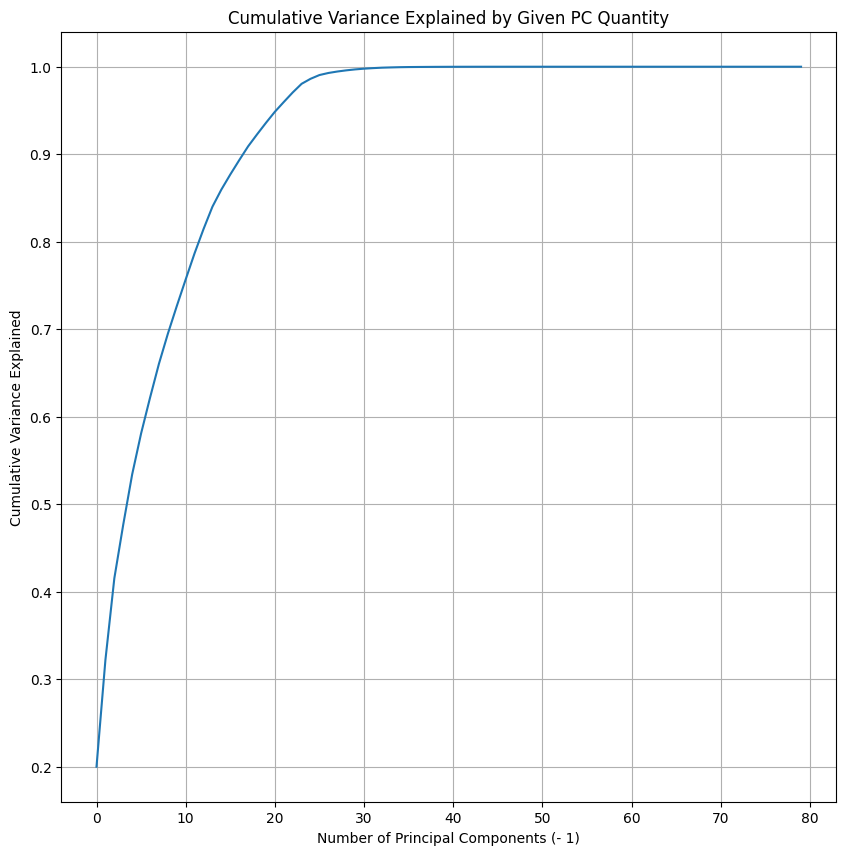

In [84]:
# Scale data in preparation for PCA
df_pca = X.copy()
df_scaled = StandardScaler().fit_transform(df_pca)

# default PCA value is a number of components equal to the number of features. We also get the cumulative variance explained by each quantity of PCs.
pca_all_fitted = PCA(random_state=42).fit(df_scaled)
explained_variance_cumulative = np.cumsum(pca_all_fitted.explained_variance_ratio_)

# Plot the curve of PCA components to explained variance  
plt.figure(figsize=(10,10)) 
plt.plot(explained_variance_cumulative)   
plt.grid() 
plt.xlabel('Number of Principal Components (- 1)') 
plt.ylabel('Cumulative Variance Explained')  
plt.title('Cumulative Variance Explained by Given PC Quantity')
plt.show()

In [85]:
variance = 0.95
test_pca = PCA(random_state=42, n_components=variance).fit_transform(df_scaled)
print(f"PCA with explained variance threshold of {variance} results in {test_pca.shape[1]} PCs.")

PCA with explained variance threshold of 0.95 results in 22 PCs.
